### **What are the most demanded skills for the top 3 most popular data roles?**

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

#### Import Libraries and Data

In [30]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter Data for the United States

In [38]:
df_US=df[(df['job_country']=='United States') ]

#### Explode Skills

In [39]:
df_skills=df_US.copy()
df_skills=df_skills.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


#### Count Skills per Job Title

In [40]:

df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values( by='skill_count',ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


#### Create List of Top 3 Roles

In [41]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

#### Plot Skill Counts

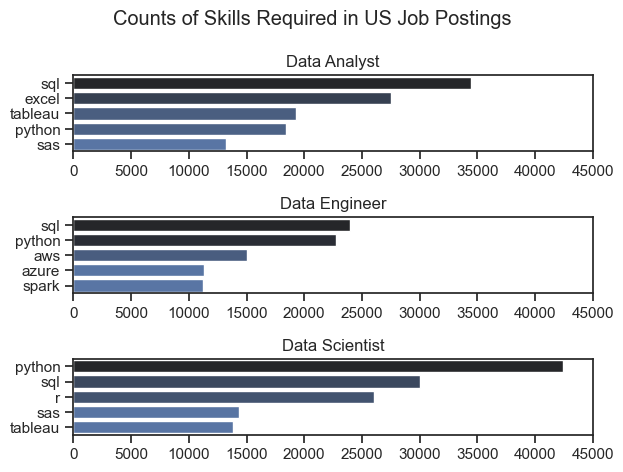

In [42]:
fig,ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_count',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,45000)
fig.suptitle('Counts of Skills Required in US Job Postings') 
fig.tight_layout()   
plt.show()

#### Convert Counts to Percentages
We'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

In [43]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [ ]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,on='job_title_short',how='left')
df_skills_perc['skill_percent']=round((df_skills_perc['skill_count']/df_skills_perc['jobs_total'])*100)
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.0
1,sql,Data Analyst,34452,67816,51.0
2,sql,Data Scientist,30034,58830,51.0
3,excel,Data Analyst,27519,67816,41.0
4,r,Data Scientist,26022,58830,44.0
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.0
1866,vb.net,Senior Data Scientist,1,12946,0.0
1867,fortran,Machine Learning Engineer,1,921,0.0
1868,planner,Cloud Engineer,1,423,0.0


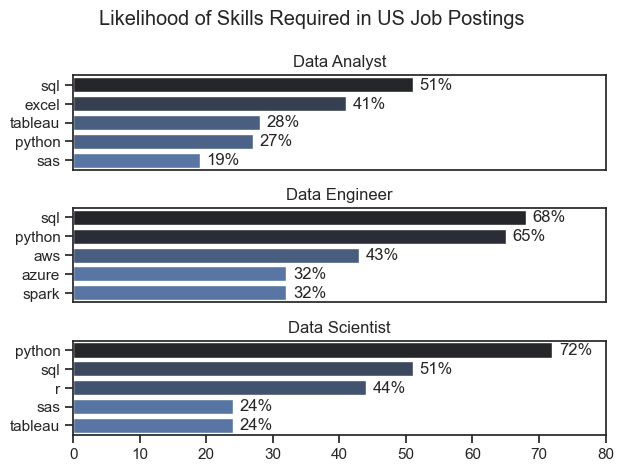

In [55]:
fig,ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,80)
    #remove x-axis tick labels
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])
    #label the percentage on the bars
    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
fig.suptitle('Likelihood of Skills Required in US Job Postings') 
fig.tight_layout()   
plt.show()